# **Projeto Exemplo de Classificação de Tipos de Flores - Etapa 1**

### Este Notebook detalha todas as etapas referentes a primeira entrega para um projeto de exemplo.

### 1. Baixar o Dataset do Kaggle

In [ ]:
!pip install opendatasets
!pip install pandas
!pip install imagehash

In [ ]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/lara311/flowers-five-classes")

Skipping, found downloaded files in "./flowers-five-classes" (use force=True to force download)


In [ ]:
!ls

flowers-five-classes  sample_data


### 2. Criar um Dataframe com os metadados das imagens

In [ ]:
import cv2
import os

In [ ]:
root_dir = './flowers-five-classes/train'

In [ ]:
import pandas as pd
import imagehash
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
count_corrupted = 0
corrupted = list()

In [ ]:
dataframe_list = list()
for folder in os.listdir(root_dir):
  child_dir = os.path.join(root_dir, folder)

  for image in os.listdir(child_dir):
    img_dir = os.path.join(child_dir, image)
    _, image_format = image.split('.')
    image_format = image_format.lower()
    img = cv2.imread(img_dir)


    if img is not None:
      img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      # Converter a imagem OpenCV para uma imagem do Pillow
      img_pil = Image.fromarray(img_rgb)

      # Gerar o hash da imagem (usando perceptual hash como exemplo)
      img_hash = imagehash.phash(img_pil)
      width, height, channels = img.shape
      img_corrupted = False
    else:
      count_corrupted += 1
      corrupted.append(img_dir)
      img_corrupted = True
      img_hash, image_format, width, height, channels = None, None, None, None, None

    dataframe_list.append([img_dir, img_corrupted, img_hash, image_format, width, height, channels, folder])

In [ ]:
print(f'Total de Imagens Corrompidas: {count_corrupted}\nImagens corrompidas {corrupted}')

Total de Imagens Corrompidas: 0
Imagens corrompidas []


In [ ]:
df = pd.DataFrame(columns=['image_path', 'corrupted', 'image_hash', 'image_format', 'width', 'height', 'channels', 'label'], data = dataframe_list)

In [ ]:
df.head()

,image_path,corrupted,image_hash,image_format,width,height,channels,label
0,./flowers-five-classes/train/tulip/17469578564...,False,bec1490f18fd01b7,jpg,332,500,3,tulip
1,./flowers-five-classes/train/tulip/14093884601...,False,a11bce7e24607b39,jpg,213,320,3,tulip
2,./flowers-five-classes/train/tulip/16680930777...,False,c5c0661e8b7b79d0,jpg,213,320,3,tulip
3,./flowers-five-classes/train/tulip/9030467406_...,False,c9f3e3c8a82c5e16,jpg,211,320,3,tulip
4,./flowers-five-classes/train/tulip/6998661030_...,False,8d39759656c619c6,jpg,332,500,3,tulip


### 3. Verificar a Integridade dos Arquivos

In [ ]:
#Informações estatísticas dos valores de altura, largura e canais das imagens

df.describe().loc[['mean', 'std', 'min', 'max']]

,width,height,channels
mean,267.994538,362.329570,3.0
std,47.883758,116.982811,0.0
min,159.000000,143.000000,3.0
max,441.000000,1024.000000,3.0


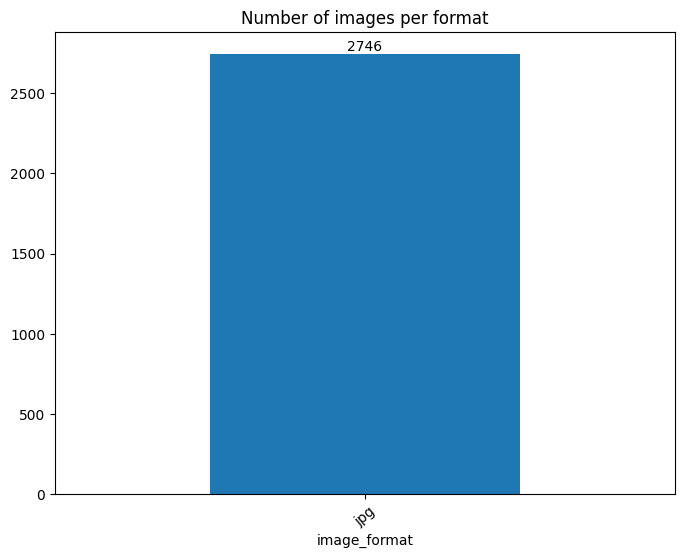

In [ ]:
#Quantidade de Imagens por formato (JPG, PNG, etc.)

# Geração do gráfico de barras
ax = df['image_format'].value_counts().plot(kind='bar', title='Number of images per format', figsize=(8, 6))

# Rotacionando os rótulos no eixo X
plt.xticks(rotation=40)

# Adicionando os valores exatos em cima de cada barra
for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Exibindo o gráfico
plt.show()

### 4. Verificar a Consistência dos Metadados

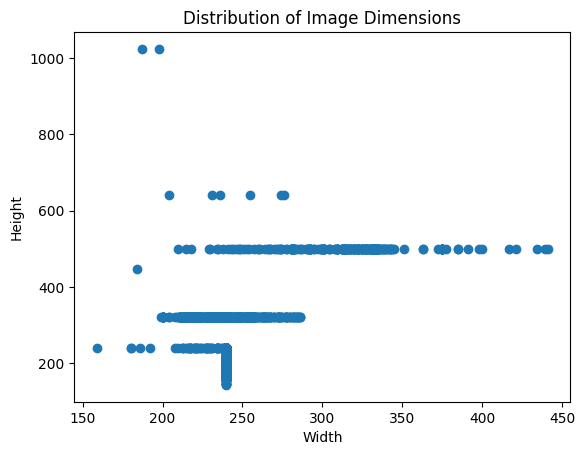

In [ ]:
#Distribuição das Dimensões de Altura e Largura das Imagens

plt.scatter(df['width'], df['height'])
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Distribution of Image Dimensions')
plt.show()

In [ ]:
#Quantidade de informações nulas
df.isnull().sum()

,0
image_path,0
corrupted,0
image_hash,0
image_format,0
width,0
height,0
channels,0
label,0


### 5. Analisar a Qualidade das Imagens

In [ ]:
#Total de imagens corrompidas

df['corrupted'].sum()

0

In [ ]:
#Quantidade de imagens corrompidas e não corrompidas

df['corrupted'].value_counts()

,count
corrupted,
False,2746


### 6. Verificar a Distribuição das Classes

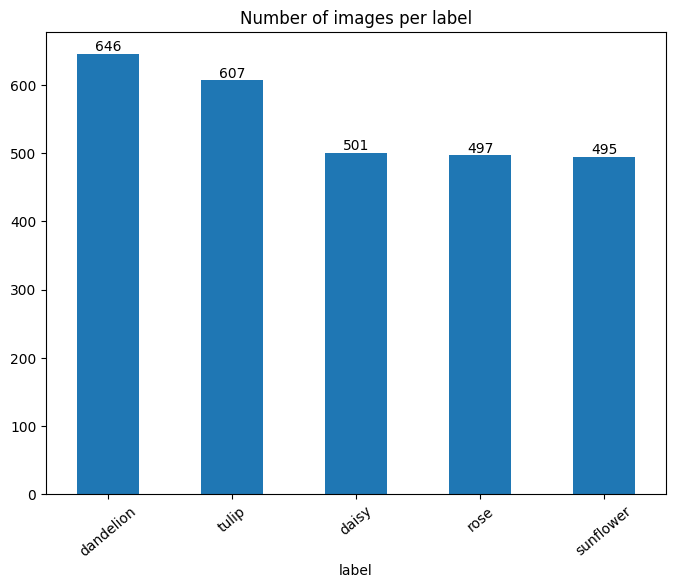

In [ ]:
#Número de Imagens por Classe

ax = df['label'].value_counts().plot(kind='bar', title='Number of images per label', figsize=(8, 6))

# Rotacionando os rótulos no eixo X
plt.xticks(rotation=40)

# Adicionando os valores exatos em cima de cada barra
for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Exibindo o gráfico
plt.show()

### 7. Verificar a Presença de Duplicatas

In [ ]:
#Quantidade de imagens duplicatas

df['image_hash'].duplicated().sum()

5

In [ ]:
#Imagens duplicatas

df_duplicated = df[df['image_hash'].duplicated()]
df_duplicated

,image_path,corrupted,image_hash,image_format,width,height,channels,label
1285,./flowers-five-classes/train/rose/15922772266_...,False,a4259e9e9a69c999,jpg,333,500,3,rose
2126,./flowers-five-classes/train/sunflower/1506643...,False,acb23515c5d6147b,jpg,221,240,3,sunflower
2155,./flowers-five-classes/train/sunflower/1506945...,False,adb2b604d6cc526d,jpg,239,320,3,sunflower
2359,./flowers-five-classes/train/daisy/10993818044...,False,d9c327ec0c2e709b,jpg,333,500,3,daisy
2744,./flowers-five-classes/train/daisy/10466290366...,False,85b436477a99c7b0,jpg,333,500,3,daisy


In [ ]:
duplicated_images = {}
for i in range(df_duplicated.shape[0]):
  hash_duplicated = df_duplicated.iloc[i]['image_hash']
  duplicated = df[df['image_hash'] == hash_duplicated]["image_path"].values
  duplicated_images[str(hash_duplicated)] = duplicated.tolist()

In [ ]:
#Imagens correspondentes a cada imagem duplicada

duplicated_images

{'a4259e9e9a69c999': ['./flowers-five-classes/train/tulip/15922772266_1167a06620.jpg',
  './flowers-five-classes/train/rose/15922772266_1167a06620.jpg'],
 'acb23515c5d6147b': ['./flowers-five-classes/train/sunflower/14889392928_9742aed45b_m.jpg',
  './flowers-five-classes/train/sunflower/15066430311_fb57fa92b0_m.jpg'],
 'adb2b604d6cc526d': ['./flowers-five-classes/train/sunflower/15072973261_73e2912ef2_n.jpg',
  './flowers-five-classes/train/sunflower/15069459615_7e0fd61914_n.jpg'],
 'd9c327ec0c2e709b': ['./flowers-five-classes/train/daisy/10993710036_2033222c91.jpg',
  './flowers-five-classes/train/daisy/10993818044_4c19b86c82.jpg'],
 '85b436477a99c7b0': ['./flowers-five-classes/train/daisy/10994032453_ac7f8d9e2e.jpg',
  './flowers-five-classes/train/daisy/10466290366_cc72e33532.jpg']}

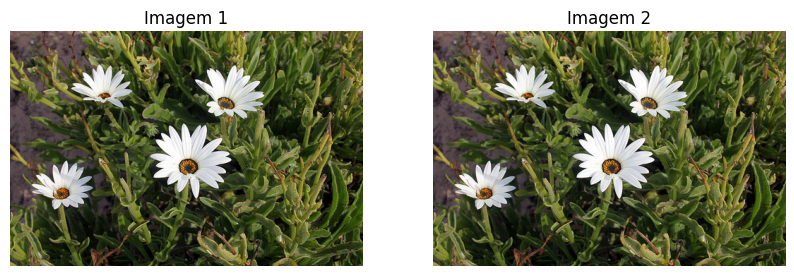

In [ ]:
image1 = cv2.imread('./flowers-five-classes/train/daisy/10993710036_2033222c91.jpg')
image2 = cv2.imread('./flowers-five-classes/train/daisy/10993818044_4c19b86c82.jpg')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Converter de BGR (formato OpenCV) para RGB (formato Matplotlib)
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Mostrar a primeira imagem
axes[0].imshow(image1_rgb)
axes[0].axis('off')  # Remove os eixos
axes[0].set_title('Imagem 1')

# Mostrar a segunda imagem
axes[1].imshow(image2_rgb)
axes[1].axis('off')  # Remove os eixos
axes[1].set_title('Imagem 2')

# Exibir as imagens
plt.show()

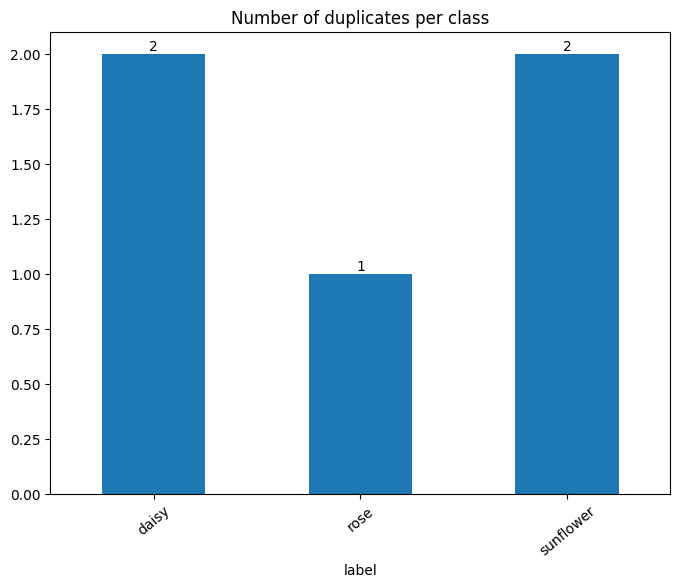

In [ ]:
# Agrupando duplicatas por classe (coluna 'label') e contando
duplicates_by_class = df_duplicated.groupby('label').size()

# Gerando o gráfico de barras
ax = duplicates_by_class.plot(kind='bar', title='Number of duplicates per class', figsize=(8, 6))

# Adicionando os valores exatos em cima de cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Ajustando a rotação dos rótulos no eixo X
plt.xticks(rotation=40)

# Exibindo o gráfico
plt.show()